In [2]:
import sys
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages')
sys.path.append('/home/aklantbhowmick/anaconda3/lib/python3.7/site-packages/scalpy/')
sys.path.append('/home/aklantbhowmick/anaconda3/envs/nbodykit-env/lib/python3.6/site-packages/')
import mdot_to_Lbol
import arepo_package
import scipy.interpolate
radiative_efficiency=0.1
total_conv=mdot_to_Lbol.get_conversion_factor_arepo(radiative_efficiency)
import h5py
%pylab inline

def get_group_ids(output_path,z_current,N,group_type='group'):    
    if (group_type=='groups'):              
        masstype,output_redshift=(arepo_package.get_group_property(output_path,'GroupMassType', desired_redshift));
    elif (group_type=='subhalo'):              
        masstype,output_redshift=(arepo_package.get_subhalo_property(output_path,'SubhaloMassType', desired_redshift));
        subhalo_group_number,output_redshift=(arepo_package.get_subhalo_property(output_path,'SubhaloGrNr', desired_redshift));
        
    mass=masstype[:,1]
    indices=numpy.argsort(mass)[-N:]
    if (group_type=='groups'):   
        return indices
    if (group_type=='subhalo'):  
        return indices,subhalo_group_number[indices]


path_to_parameter_file='/home/aklantbhowmick/Aklant/preparing_files_for_zoom_simulations/zoom_parameters.txt'    
fp=open(path_to_parameter_file)
line=1
while line:
    line = fp.readline()
    exec(line)
    
    
    


Populating the interactive namespace from numpy and matplotlib


Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
Below are the list of properties for ptype  1
dict_keys(['count', 'Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
Below are the list of properties for ptype  2
dict_keys(['count', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
Below are the list of properties for ptype  2
dict_keys(['count', 'Coordinates', 'Masses', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities'])
Desired redshift:  0.0
Output redshift:  2.220446049250313e-16
Output snapshot:  20
{'NumPart_ThisFile': array([340007, 215267, 114581,      0,

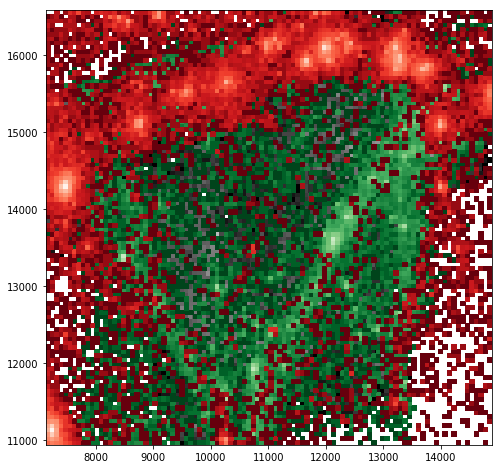

In [3]:
path_to_output='/ufrc/lblecha/aklantbhowmick/NEW_AREPO_RUNS/'
run='L25n128MUSIC_rerun_zoom_levelmax10_haloindex100_redshift0.00/AREPO/'
output_folder='/output/'
basePath=path_to_output+run+output_folder
particle_property='Coordinates'

desired_redshift=0.0
subhalo_index=0
p_type=1
Positions_for_1,output_redshift=arepo_package.get_particle_property_within_groups(basePath, particle_property, p_type, desired_redshift, subhalo_index, group_type='groups', list_all=True)

p_type=2
Positions_for_2,output_redshift=arepo_package.get_particle_property_within_groups(basePath, particle_property, p_type, desired_redshift, subhalo_index, group_type='groups', list_all=True)

p_type=1
Positions_all_1,output_redshift=arepo_package.get_particle_property(basePath, particle_property, p_type, desired_redshift, list_all=True)

p_type=2
Positions_all_2,output_redshift=arepo_package.get_particle_property(basePath, particle_property, p_type, desired_redshift, list_all=True)

particle_property='Masses'
Masses,output_redshift=arepo_package.get_particle_property(basePath, particle_property, p_type, desired_redshift, list_all=True)


header=arepo_package.load_snapshot_header(basePath,desired_redshift)
high_resolution_mass=(header['MassTable'])[1]

min_x=numpy.amin(Positions_all_1[:,0])
min_y=numpy.amin(Positions_all_1[:,1])
min_z=numpy.amin(Positions_all_1[:,2])

max_x=numpy.amax(Positions_all_1[:,0])
max_y=numpy.amax(Positions_all_1[:,1])
max_z=numpy.amax(Positions_all_1[:,2])

extract_x=(Positions_all_2[:,0]>min_x)&(Positions_all_2[:,0]<max_x)
extract_y=(Positions_all_2[:,1]>min_y)&(Positions_all_2[:,1]<max_y)
extract_z=(Positions_all_2[:,2]>min_z)&(Positions_all_2[:,2]<max_z)

sorted_Masses=numpy.unique(Masses)

low_resolution_mass=numpy.amax(Masses)
extract_masses=numpy.array([Masses==sorted_Mass for sorted_Mass in sorted_Masses]) 

Positions_all_2_extracted=numpy.array([Positions_all_2[(extract_x&extract_y)&(extract_z&extract_mass)] for extract_mass in extract_masses])

group_property='GroupPos'
GroupPosition,output_redshift=arepo_package.get_group_property(basePath, group_property, desired_redshift, list_all=True)
GroupPosition=GroupPosition[0]

group_property='Group_R_Mean200'
GroupR200,output_redshift=arepo_package.get_group_property(basePath, group_property, desired_redshift, list_all=True)
GroupR200=GroupR200[0]


NBINS=100
f,ax=plt.subplots(1,1,figsize=(8,8))
opacity=1
obj=ax


for Positions_all_2_extracted_single,col_map in zip(Positions_all_2_extracted,['Greys_r','Greens_r','Reds_r']):
    obj.hist2d(Positions_all_2_extracted_single[:,0],Positions_all_2_extracted_single[:,1], bins=(NBINS,NBINS), norm=mpl.colors.LogNorm(),cmap=col_map,alpha=opacity);

NBINS=200




In [26]:
def min_dis(median_position, position,box_size):
        pos_1=position-median_position
        pos_2=position-median_position+box_size
        pos_3=position-median_position-box_size

        new_position_options=numpy.array([pos_1,pos_2,pos_3])
        get_minimum_distance=numpy.argmin(numpy.abs(new_position_options))
        #print(new_position_options)

        print(get_minimum_distance)
        
        return numpy.sum(new_position_options[get_minimum_distance]**2)

In [27]:
def calc_ratio(N,Positions_all_2_extracted_single,low_res_mass):
    x_2=Positions_all_2_extracted_single[:,0]
    y_2=Positions_all_2_extracted_single[:,1]
    z_2=Positions_all_2_extracted_single[:,2]
    
    x_1=Positions_all_1[:,0]
    y_1=Positions_all_1[:,1]
    z_1=Positions_all_1[:,2]
    
    group_x=GroupPosition[0]
    group_y=GroupPosition[1]
    group_z=GroupPosition[2]
    
    #print(group_x)
    
    extract_x1=(x_1>group_x-N*GroupR200)&(x_1<group_x+N*GroupR200)
    extract_y1=(y_1>group_y-N*GroupR200)&(y_1<group_y+N*GroupR200)
    extract_z1=(z_1>group_z-N*GroupR200)&(z_1<group_z+N*GroupR200)
    
    extract_x2=(x_2>group_x-N*GroupR200)&(x_2<group_x+N*GroupR200)
    extract_y2=(y_2>group_y-N*GroupR200)&(y_2<group_y+N*GroupR200)
    extract_z2=(z_2>group_z-N*GroupR200)&(z_2<group_z+N*GroupR200)
    
    extract1=(extract_x1&extract_y1)&extract_z1
    extract2=(extract_x2&extract_y2)&extract_z2
    
    number_low_res=len(x_2[extract2])
    number_high_res=len(x_1[extract1])
    
    total_mass_low_res=low_res_mass*number_low_res
    total_mass_high_res=high_resolution_mass*number_high_res
    
    fraction=numpy.float(number_low_res)/(number_low_res+number_high_res)
    fraction_mass=numpy.float(total_mass_low_res)/(total_mass_high_res+total_mass_low_res)
    
    return fraction,fraction_mass
    
    
    

Text(0, 0.5, 'mass fraction of particle type 2')

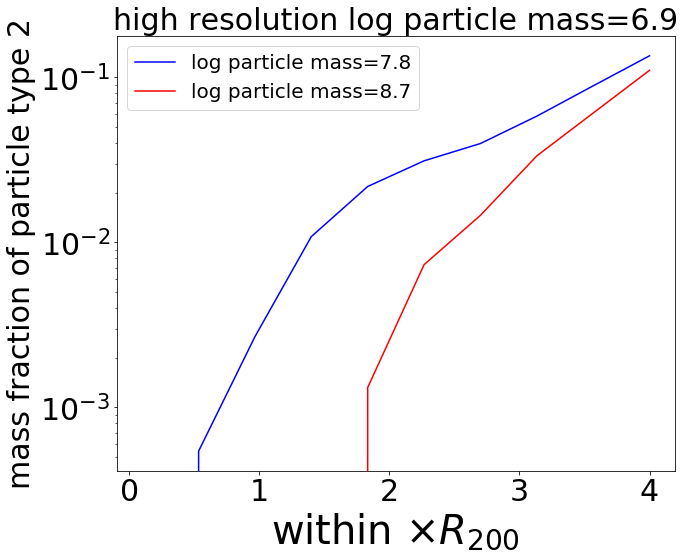

In [28]:
N_space=numpy.linspace(0.1,4,10)

cols=['blue','red','green']
f,ax=plt.subplots(1,1,figsize=(10,8))
for Positions_all_2_extracted_single,sorted_mass,col in list(zip(Positions_all_2_extracted,sorted_Masses,cols)):
    ratio_space=numpy.array([calc_ratio(N,Positions_all_2_extracted_single,sorted_mass) for N in N_space])
    ax.plot(N_space,ratio_space[:,1],color=col,label='log particle mass=%.1f'%numpy.log10(sorted_mass*1e10))
    
ax.set_title('high resolution log particle mass=%.1f'%numpy.log10(high_resolution_mass*1e10),fontsize=30)
ax.tick_params(labelsize=30)
ax.legend(loc='upper left',fontsize=20)
ax.set_yscale('log')
ax.set_xlabel(r'within $\times R_{200} $',fontsize=40)
ax.set_ylabel('mass fraction of particle type 2',fontsize=30)

Text(0, 0.5, 'number fraction of particle type 2')

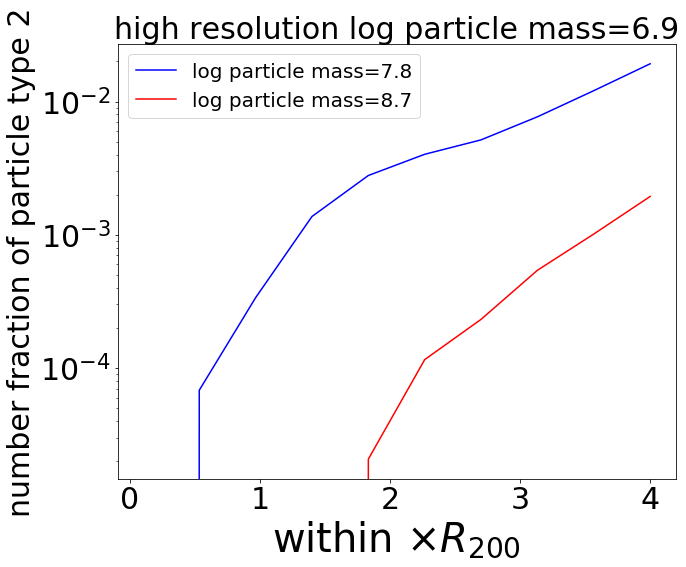

In [29]:
N_space=numpy.linspace(0.1,4,10)

cols=['blue','red','green']
f,ax=plt.subplots(1,1,figsize=(10,8))
for Positions_all_2_extracted_single,sorted_mass,col in list(zip(Positions_all_2_extracted,sorted_Masses,cols)):
    ratio_space=numpy.array([calc_ratio(N,Positions_all_2_extracted_single,sorted_mass) for N in N_space])
    ax.plot(N_space,ratio_space[:,0],color=col,label='log particle mass=%.1f'%numpy.log10(sorted_mass*1e10))
ax.set_title('high resolution log particle mass=%.1f'%numpy.log10(high_resolution_mass*1e10),fontsize=30)

ax.tick_params(labelsize=30)
ax.legend(loc='upper left',fontsize=20)
ax.set_yscale('log')
ax.set_xlabel(r'within $\times R_{200} $',fontsize=40)
ax.set_ylabel('number fraction of particle type 2',fontsize=30)



Text(0, 0.5, 'number fraction of low resolution particles')

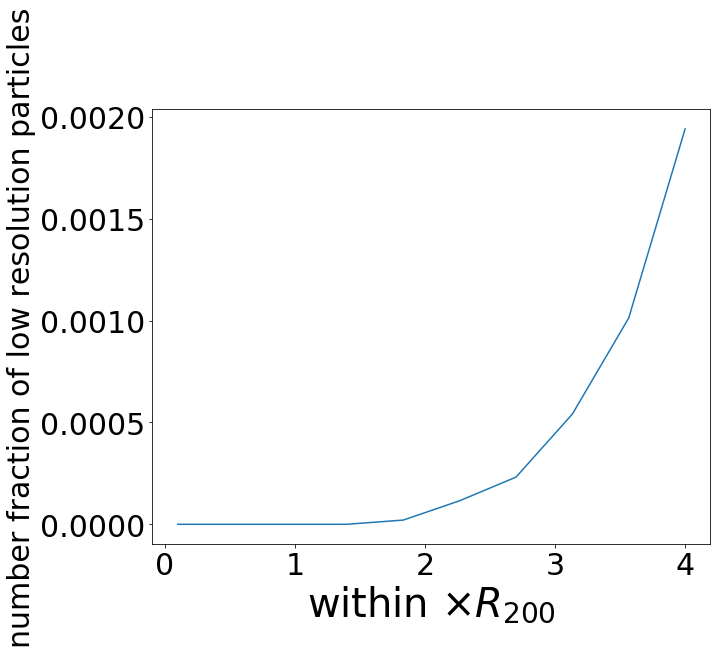

Text(0, 0.5, 'mass fraction of low resolution particles')

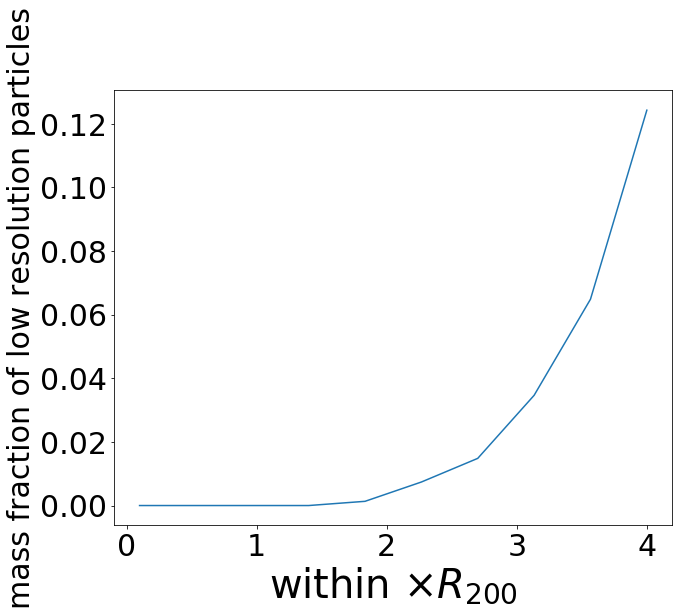

In [84]:
f,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(N_space,ratio_space[:,1])
ax.tick_params(labelsize=30)
ax.set_xlabel(r'within $\times R_{200} $',fontsize=40)
ax.set_ylabel('mass fraction of low resolution particles',fontsize=30)